c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<AxesSubplot:>

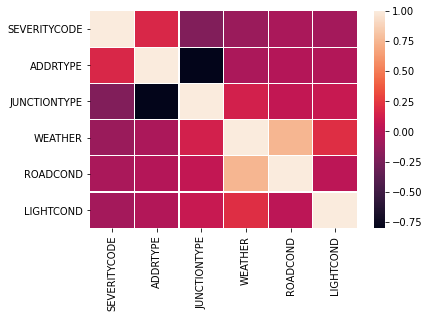

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

df_sev=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")

#clean the data
df_sev['ADDRTYPE'].fillna('Other',inplace=True)
df_sev['JUNCTIONTYPE'].fillna('Other',inplace=True)
df_sev['WEATHER'].fillna('Other',inplace=True)
df_sev['LIGHTCOND'].fillna('Other',inplace=True)
df_sev['ROADCOND'].fillna('Other',inplace=True)

df_sev = df_sev.drop(columns = ['OBJECTID', 'SEVERITYCODE.1', 'REPORTNO', 'INCKEY', 'COLDETKEY', 
              'X', 'Y', 'STATUS',
              'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
              'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDATE',
              'INCDTTM', 'SDOT_COLCODE',
              'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM',
              'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY',
              'CROSSWALKKEY', 'HITPARKEDCAR', 'PEDCOUNT', 'PEDCYLCOUNT',
              'PERSONCOUNT', 'VEHCOUNT', 'COLLISIONTYPE',
              'SPEEDING', 'UNDERINFL', 'INATTENTIONIND'])

severity =preprocessing.LabelEncoder()
severity.fit(df_sev['SEVERITYCODE'])
df_sev['SEVERITYCODE']=severity.transform(df_sev['SEVERITYCODE'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['ADDRTYPE'])
df_sev['ADDRTYPE']=addrtype.transform(df_sev['ADDRTYPE'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['JUNCTIONTYPE'])
df_sev['JUNCTIONTYPE']=addrtype.transform(df_sev['JUNCTIONTYPE'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['WEATHER'])
df_sev['WEATHER']=addrtype.transform(df_sev['WEATHER'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['ROADCOND'])
df_sev['ROADCOND']=addrtype.transform(df_sev['ROADCOND'])

addrtype=preprocessing.LabelEncoder()
addrtype.fit(df_sev['LIGHTCOND'])
df_sev['LIGHTCOND']=addrtype.transform(df_sev['LIGHTCOND'])

#df_sev.head(5)
df_sev.corr()

sns.heatmap(df_sev.corr(),linewidth=0.2,cbar_kws={"shrink":1})

Train set: (136271, 5) (136271,)
Test set: (58402, 5) (58402,)


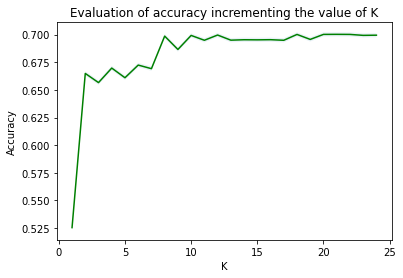

In [2]:
#Data preparation
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
X = df_sev.drop('SEVERITYCODE', axis=1)
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]
y=np.asarray(df_sev['SEVERITYCODE'])
y[0:5]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
                                               
Ks=25
mean_acc=np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfustionMx=[]
for n in range(1,Ks):
   neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
   yhat=neigh.predict(X_test)
   mean_acc[n-1]=metrics.accuracy_score(y_test,yhat)
   std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc
plt.plot(range(1,Ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,Ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)
plt.show()

In [3]:
print("The best accuracy was with", mean_acc.max(),"with k=",mean_acc.argmax()+1)

The best accuracy was with 0.7002842368412041 with k= 21


In [4]:
# Decision Tree
X_train_train,X_train_test,y_train_train,y_train_test = \
               train_test_split(X_train,y_train,test_size=0.2,random_state=0)
print('part Train set:',X_train_train.shape,y_train_train.shape)
print('part Test set:',X_train_test.shape,y_train_test.shape)
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

depth=21
mean_acc1=np.zeros(depth - 4)
for n in range(4,depth):
   tree=DecisionTreeClassifier(criterion='entropy',max_depth=depth).fit(X_train_train,y_train_train)
   yhat=tree.predict(X_train_test)
   mean_acc1[n-4]=metrics.accuracy_score(y_train_test,yhat)

print("The mean accuracy array is:",mean_acc1)
print("\nThe maximum mean accuracy value is:",mean_acc1.max())

max_depth=list(mean_acc1).index(mean_acc1.max())+4
print("\nThe best model is the model with max_depth=",max_depth)

part Train set: (109016, 5) (109016,)
part Test set: (27255, 5) (27255,)
The mean accuracy array is: [0.69645937 0.69638598 0.69645937 0.69645937 0.69645937 0.69649606
 0.69649606 0.69638598 0.69642267 0.69649606 0.69642267 0.69642267
 0.69642267 0.69638598 0.69642267 0.69645937 0.69649606]

The maximum mean accuracy value is: 0.6964960557695835

The best model is the model with max_depth= 9


In [5]:
severityTree=DecisionTreeClassifier(criterion='entropy',max_depth=max_depth).fit(X_train,y_train)
severityTree

DecisionTreeClassifier(criterion='entropy', max_depth=9)

In [6]:
#Logistic Regression
X_train_part=pd.DataFrame(X_train).sample(n=1000,random_state=0)
y_train_part=pd.DataFrame(y_train).sample(n=1000,random_state=0)

X_train_part_train,X_train_part_test,y_train_part_train,y_train_part_test=\
                   train_test_split(X_train_part,y_train_part,test_size=0.2,random_state=42)
print('Part Train Set:',X_train_part_train.shape,y_train_part_train.shape)
print('Part Test Set:',X_train_part_test.shape,y_train_part_test.shape)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
solvers=['newton-cg','lbfgs','liblinear','sag','saga']
mean_acc2=np.zeros((len(solvers)))

for i in range(len(solvers)):
   LR=LogisticRegression(C=0.01,solver=solvers[i]).fit(X_train_part_train,np.ravel(y_train_part_train))
   yhat=LR.predict(X_train_part_test)
   mean_acc2[i]=metrics.accuracy_score(y_train_part_test,yhat)
print("mean accuracy array:",mean_acc2)
print("\nmaximum mean accuracy value:",mean_acc2.max())

Part Train Set: (800, 5) (800, 1)
Part Test Set: (200, 5) (200, 1)
mean accuracy array: [0.685 0.685 0.67  0.685 0.685]

maximum mean accuracy value: 0.685


In [10]:

from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

Kyhat = neigh.predict(X_test)
f1_score(y_test, Kyhat, average='macro')

0.45670261566621373

In [13]:
LRyhat = LR.predict(X_test)
f1_score(y_test, LRyhat, average='macro')

0.4154650876236762

In [15]:
yhat_prob = LR.predict_proba(X_test)
log_loss(y_test, yhat_prob)

0.585248742737657